In [1]:
from platform import python_version

print(python_version())

from sim import *
from npcs import Tekton5, Tekton3, Npc
import matplotlib
import matplotlib.pyplot as plt


%matplotlib notebook

3.7.3


In [2]:
def ticks_to_kill(npc, players):
    i = 0
    for _ in run(copy(npc), players):
        i += 1
    return i

In [3]:
ticks_to_kill(Tekton5, [hammerbgs for _ in range(4)])

29

In [5]:
def bgsrole(npc):
    yield scythe
    yield bgs
    yield bgs
    
    while True:
        yield scythe
        
def slowbgsrole(npc):
    yield scythe
    yield scythe
    
    yield bgs
    yield bgs
    
    while True:
        yield scythe
        
def doublebgs(npc):
    yield bgs
    yield bgs
    while True:
        yield scythe

In [6]:
hammer_bgs_results = [ticks_to_kill(Tekton3, [hammerbgs for _ in range(3)]) for _ in range(10000)]

In [7]:
hammer_hammer_results = [ticks_to_kill(Tekton3, [doublehammer for _ in range(3)]) for _ in range(10000)]

In [8]:
mixed_results_1 = [ticks_to_kill(Tekton3, [doublehammer, doublehammer, bgsrole]) for _ in range(10000)]

In [9]:
mixed_results_2 = [ticks_to_kill(Tekton3, [doublehammer, hammerbgs, bgsrole]) for _ in range(10000)]

In [10]:
all_bgs_results = [ticks_to_kill(Tekton3, [doublebgs for _ in range(3)]) for _ in range(10000)]

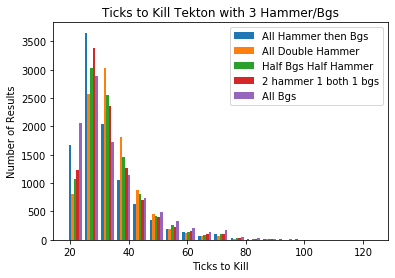

In [11]:
plt.hist(
    [hammer_bgs_results, hammer_hammer_results, mixed_results_1, mixed_results_2, all_bgs_results], 
    label=["All Hammer then Bgs", "All Double Hammer", "Half Bgs Half Hammer", "2 hammer 1 both 1 bgs", "All Bgs"], 
    bins=max(hammer_hammer_results) // 5)
plt.xlabel("Ticks to Kill")
plt.ylabel("Number of Results")
plt.title("Ticks to Kill Tekton with 3 Hammer/Bgs")
plt.legend(loc="upper right")
plt.show()

In [12]:
def is_zero_anvil(ticks):
    return ticks <= 42

def print_zero_anvil_percent(results, label):
    zero_anvils = list(filter(is_zero_anvil, results))
    percent = float(len(zero_anvils)) / len(results)
    average = sum(results) / len(results)
    sorted_results = sorted(results)
    median = sorted_results[len(sorted_results) // 2]
    print(f"{label} = {percent * 100}% 0 anvil, \n average kill = {average} ticks, \n median kill = {median} ticks")

In [14]:
print_zero_anvil_percent(hammer_bgs_results, "All hammer then bgs")
print_zero_anvil_percent(hammer_hammer_results, "All hammer twice")
print_zero_anvil_percent(mixed_results_1, "2 dwh 1 bgs")
print_zero_anvil_percent(mixed_results_2, "1 dwh 1 both 1 bgs")
print_zero_anvil_percent(all_bgs_results, "All bgs")

All hammer then bgs = 84.26% 0 anvil, 
 average kill = 33.911 ticks, 
 median kill = 29 ticks
All hammer twice = 82.16% 0 anvil, 
 average kill = 35.5645 ticks, 
 median kill = 34 ticks
2 dwh 1 bgs = 81.34% 0 anvil, 
 average kill = 35.371 ticks, 
 median kill = 34 ticks
1 dwh 1 both 1 bgs = 82.46% 0 anvil, 
 average kill = 34.826 ticks, 
 median kill = 34 ticks
All bgs = 78.21000000000001% 0 anvil, 
 average kill = 35.3115 ticks, 
 median kill = 34 ticks


In [ ]:
def veng_damage(npc):
    damage = 30 * 5 # average dmg * players
    
    def veng(npc):
        npc.hp -= damage
        return 3
    
    while True:
        yield veng
        yield lambda npc: 3 # tek attack cooldown
        yield veng
        
        # veng cooldown
        yield lambda npc: 50

cm_players = [veng_damage, doublehammer, doublehammer, bgsrole, bgsrole, slowbgsrole]
CmTekton5 = Npc(
    name="Tekton",
    hp=1350,
    defense=287,
    defenses=Tekton5.defenses
)

In [ ]:
cm_results_3_dwh_2_bgs = [ticks_to_kill(CmTekton5, [veng_damage, doublehammer, doublehammer, doublehammer, bgsrole, slowbgsrole]) for _ in range(10000)]

In [ ]:
cm_results_2_dwh_3_bgs = [ticks_to_kill(CmTekton5, [veng_damage, doublehammer, doublehammer, bgsrole, bgsrole, slowbgsrole]) for _ in range(10000)]

In [ ]:
cm_results_4_dwh_1_bgs = [ticks_to_kill(CmTekton5, [veng_damage, doublehammer, doublehammer, doublehammer, doublehammer, slowbgsrole]) for _ in range(10000)]

In [ ]:
cm_results_all_dwh = [ticks_to_kill(CmTekton5, [veng_damage, doublehammer, doublehammer, doublehammer, doublehammer, doublehammer]) for _ in range(10000)]

In [ ]:
print_zero_anvil_percent(cm_results_3_dwh_2_bgs, "5 man CM 3 dwh 2 bgs")
print_zero_anvil_percent(cm_results_2_dwh_3_bgs, "5 man CM 2 dwh 3 bgs")
print_zero_anvil_percent(cm_results_all_dwh, "5 man CM 5 dwh")
print_zero_anvil_percent(cm_results_4_dwh_1_bgs, "5 man CM 4 dwh 1 bgs")

In [ ]:
def prune(results):
    return list(filter(lambda result: result < 70, results))

plt.hist(
    list(map(prune, [cm_results_3_dwh_2_bgs, cm_results_2_dwh_3_bgs, cm_results_all_dwh, cm_results_4_dwh_1_bgs])), 
    label=["3 dwh 2 bgs", "2 dwh 3 bgs", "5 dwh", "4 dwh 1 bgs"], bins=25)
plt.xlabel("Ticks to Kill")
plt.ylabel("Number of Results")
plt.title("Ticks to Kill CM Tekton with 5 players")
plt.legend(loc="upper right")
plt.show()